In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf

tf.random.set_seed(42)
print(tf.__version__)

2.5.0


In [8]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [9]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
import matplotlib.pyplot as plt

In [6]:
sample_index = 5000

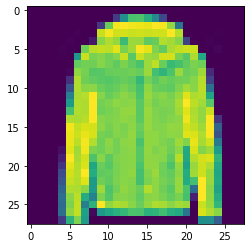

In [7]:
plt.imshow(X=train_data[sample_index])

In [8]:
train_labels[sample_index]

4

In [9]:
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

label_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [10]:
label_dict[train_labels[sample_index]]

'Coat'

In [11]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [12]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [18]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(len(train_labels), activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
# model.compile(
#     loss=tf.keras.losses.binary_crossentropy, # this is for binary class classification, would give ERROR
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
#     metrics=['accuracy']
# )

### error because of the loss function

In [19]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # this is for multiclass classification
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                metrics=['accuracy'])

# Fit the model
epochs=5
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history_fit = model.fit(train_data, train_labels, epochs=epochs, callbacks=[lr_scheduler])

Epoch 1/5
1875/1875 [==============================] - 177s 94ms/step - loss: 4.0713 - accuracy: 0.0995
Epoch 2/5
1875/1875 [==============================] - 184s 98ms/step - loss: 2.2140 - accuracy: 0.1519
Epoch 3/5
1875/1875 [==============================] - 173s 92ms/step - loss: 1.4074 - accuracy: 0.4443
Epoch 4/5
1875/1875 [==============================] - 172s 92ms/step - loss: 1.1376 - accuracy: 0.5572
Epoch 5/5
1875/1875 [==============================] - 170s 91ms/step - loss: 0.9963 - accuracy: 0.6298


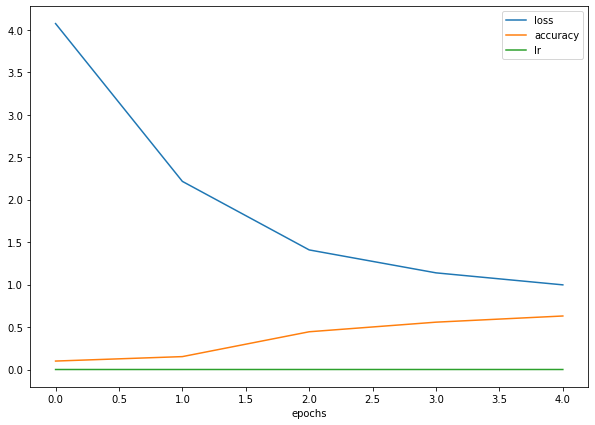

In [32]:
import pandas as pd

# Checkout the history
pd.DataFrame(history_fit.history).plot(figsize=(10,7), xlabel="epochs");

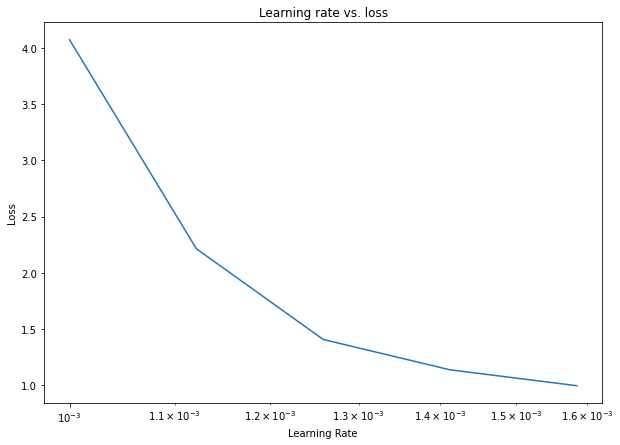

In [31]:
import numpy as np

# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(epochs)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_fit.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [10]:
# Create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(len(train_labels), activation="sigmoid")
])

# Compile the model
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0016), # using the lr found above
                metrics=['accuracy'])

# Fit the model
epochs=5
history_fit = model2.fit(train_data, train_labels, epochs=epochs)

Epoch 1/5
1875/1875 [==============================] - 120s 63ms/step - loss: 1.3261 - accuracy: 0.4960
Epoch 2/5
1875/1875 [==============================] - 124s 66ms/step - loss: 0.9827 - accuracy: 0.6340
Epoch 3/5
1875/1875 [==============================] - 121s 64ms/step - loss: 0.9062 - accuracy: 0.6537
Epoch 4/5
1875/1875 [==============================] - 123s 66ms/step - loss: 0.8697 - accuracy: 0.6674
Epoch 5/5
1875/1875 [==============================] - 118s 63ms/step - loss: 0.8416 - accuracy: 0.6709


In [11]:

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
y_preds = model2.predict(train_data)

In [1]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

NameError: name 'make_confusion_matrix' is not defined

In [40]:
# Make predictions with the most recent model
y_probs = model2.predict([test_data[sample_index]])

# View the predictions
y_probs

ValueError: in user code:

    /srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1552 run_step  **
        outputs = model.predict_step(data)
    /srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1525 predict_step
        return self(x, training=False)
    /srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:380 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/keras/engine/functional.py:421 call
        inputs, training=training, mask=mask)
    /srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/keras/engine/functional.py:556 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /srv/conda/envs/notebook/lib/python3.6/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense_13 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 28)
